In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive

/content/gdrive


In [ ]:
cd MyDrive

/content/gdrive/MyDrive


Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as pt
import plotly
import plotly.express as ex
from textblob import TextBlob
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
pkl=pd.read_pickle('redditDataset.pkl')
nltk.download('stopwords')
nltk.download('punkt')
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Section 1

In [ ]:
dis_pkl=pkl.drop_duplicates()
dis_pkl

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor
...,...,...
76082,i would recommend anyone looking for a more de...,news
76263,so much innuendo so little facts why so coy i...,news
80398,well mlk was black and bernie is white also ...,news
81034,a man intentionally kills animals and gets 50 ...,news


Section 1 Q1 A


In [ ]:
pol_hum=[]
sub_hum=[]
pol_new=[]
sub_new=[]
hum_t=""
new_t=""
text=dis_pkl['text'].to_numpy()
sub=dis_pkl['subreddit'].to_numpy()
type(sub)
for i in range(len(dis_pkl['text'])):
  
  if(sub[i]=="humor"):
    hum_t=hum_t+" "+text[i]
    pol_hum.append(TextBlob(text[i]).sentiment[0])
    sub_hum.append(TextBlob(text[i]).sentiment[1])
  else:
    new_t=new_t+" "+text[i]
    pol_new.append(TextBlob(text[i]).sentiment[0])
    sub_new.append(TextBlob(text[i]).sentiment[1])

print(len(pol_hum))
print(len(sub_hum))
print(len(pol_new))
print(len(sub_new))




1473
1473
2178
2178


Q1 (A)

Text(0.5, 1.0, 'Plot of Polarity_humor_text ')

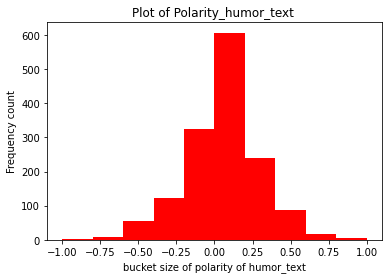

In [ ]:
mp.hist(pol_hum, bins = 10, color = 'r')
mp.ylabel("Frequency count")
mp.xlabel("bucket size of polarity of humor_text")
mp.title("Plot of Polarity_humor_text ")



Text(0.5, 1.0, 'Plot of Polarity_news_text ')

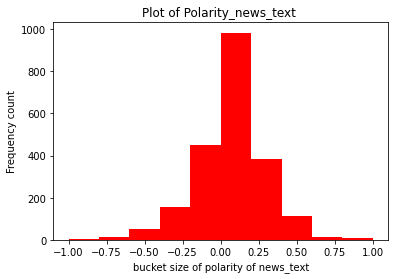

In [ ]:
mp.hist(pol_new, bins = 10, color = 'r')
mp.ylabel("Frequency count")
mp.xlabel("bucket size of polarity of news_text")
mp.title("Plot of Polarity_news_text ")

Text(0.5, 1.0, 'Plot of subjectivity_humor_text ')

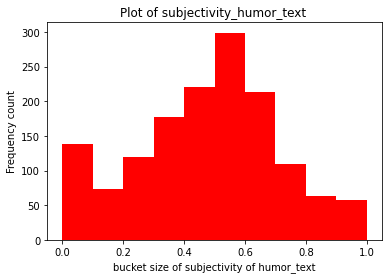

In [ ]:
mp.hist(sub_hum, bins = 10, color = 'r')
mp.ylabel("Frequency count")
mp.xlabel("bucket size of subjectivity of humor_text")
mp.title("Plot of subjectivity_humor_text ")

Text(0.5, 1.0, 'Plot of subjectivity_news_text ')

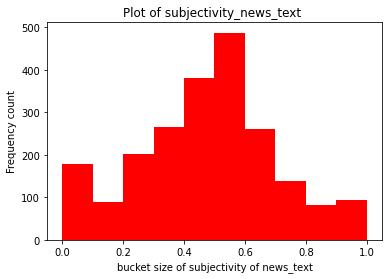

In [ ]:
mp.hist(sub_new, bins = 10, color = 'r')
mp.ylabel("Frequency count")
mp.xlabel("bucket size of subjectivity of news_text")
mp.title("Plot of subjectivity_news_text ")

stats

In [ ]:
print("Mean of polarity humor ",np.mean(np.array(pol_hum)))
print("Standard Deviation of polarity humor ",np.std(np.array(pol_hum)));

print("Mean of polarity news is: ",np.mean(np.array(pol_new)))
print("Standard Deviation of polarity news ",np.std(np.array(pol_new)));

print("Mean of subjectivity humor ",np.mean(np.array(sub_hum)))
print("Standard Deviation of subjectivity humor ",np.std(np.array(sub_hum)));

print("Mean of subjectivity news ",np.mean(np.array(sub_new)))
print("Standard Deviation of subjectivity news ",np.std(np.array(sub_new)));

Mean of polarity humor  0.05158728575619279
Standard Deviation of polarity humor  0.24866391452327927
Mean of polarity news is:  0.064048534801197
Standard Deviation of polarity news  0.23041556585535447
Mean of subjectivity humor  0.47140332998753287
Standard Deviation of subjectivity humor  0.24269324821277793
Mean of subjectivity news  0.4704749753548112
Standard Deviation of subjectivity news  0.23274569397299044


Q1 (B)

In [ ]:
sw=stopwords.words('english')
th = [i for i in nltk.word_tokenize(hum_t) if i not in sw]
dic_hum_bi=nltk.FreqDist(nltk.bigrams(th)).most_common(10)
dic_hum_uni=nltk.FreqDist(th).most_common(10)

th = [i for i in nltk.word_tokenize(new_t) if i not in sw]
dic_new_bi=nltk.FreqDist(nltk.bigrams(th)).most_common(10)
dic_new_uni=nltk.FreqDist(th).most_common(10)

hum_bi_c=[]
hum_bi_t=[]
for i in dic_hum_bi:
  hum_bi_c.append(int(i[1]))
  hum_bi_t.append(str(i[0]))

new_bi_c=[]
new_bi_t=[]
for i in dic_new_bi:
  new_bi_c.append(int(i[1]))
  new_bi_t.append(str(i[0]))

hum_uni_c=[]
hum_uni_t=[]
for i in dic_hum_uni:
  hum_uni_c.append(int(i[1]))
  hum_uni_t.append(str(i[0]))

new_uni_c=[]
new_uni_t=[]
for i in dic_new_uni:
  new_uni_c.append(int(i[1]))
  new_uni_t.append(str(i[0]))




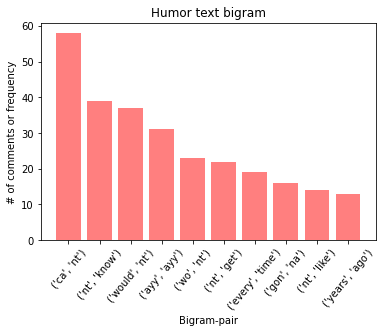

In [ ]:
mp.bar(hum_bi_t,hum_bi_c,color='r', align = 'center', alpha = 0.5)
mp.xlabel('Bigram-pair')
mp.ylabel('# of comments or frequency')
# mp.xticks(l_sen)
mp.xticks(rotation = 50)
mp.title("Humor text bigram")
mp.show()

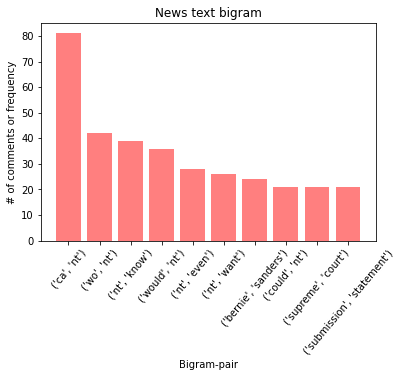

In [ ]:
mp.bar(new_bi_t,new_bi_c,color='r', align = 'center', alpha = 0.5)
mp.xlabel('Bigram-pair')
mp.ylabel('# of comments or frequency')
# mp.xticks(l_sen)
mp.xticks(rotation = 50)
mp.title("News text bigram")
mp.show()

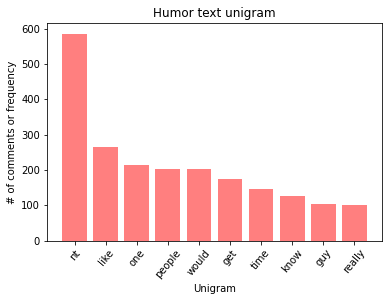

In [ ]:
mp.bar(hum_uni_t,hum_uni_c,color='r', align = 'center', alpha = 0.5)
mp.xlabel('Unigram')
mp.ylabel('# of comments or frequency')
# mp.xticks(l_sen)
mp.xticks(rotation = 50)
mp.title("Humor text unigram")
mp.show()

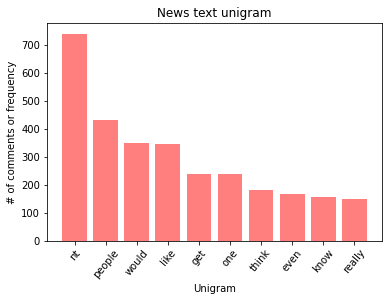

In [ ]:
mp.bar(new_uni_t,new_uni_c,color='r', align = 'center', alpha = 0.5)
mp.xlabel('Unigram')
mp.ylabel('# of comments or frequency')
# mp.xticks(l_sen)
mp.xticks(rotation = 50)
mp.title("News text unigram")
mp.show()

Q2

In [83]:
  dis_pkl.head()

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor


In [84]:
dis_pkl.isnull().sum()

text         0
subreddit    0
dtype: int64

In [85]:
bi_pkl=pd.get_dummies(dis_pkl['subreddit'], drop_first=True)

In [86]:
len(bi_pkl)
con_pkl=pd.concat([dis_pkl,bi_pkl],axis=1)
con_pkl.head(2)

,text,subreddit,news
0,that sounds like the answer of a man who does ...,humor,0
1,i always wonder what people get out of reposti...,humor,0


In [87]:
con_pkl.drop(['subreddit'],axis=1, inplace=True)

In [88]:
print(np.bincount(con_pkl['news']))
con_pkl.head()
x=con_pkl['text']
y=con_pkl['news']

[1473 2178]


In [89]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=.3, random_state=1)
print(x_tr.shape, x_te.shape, y_tr.shape, y_te.shape)

(2555,) (1096,) (2555,) (1096,)


In [90]:
xt=x_te
vect = CountVectorizer()
x_tr= vect.fit_transform(x_tr)
x_te = vect.transform(x_te)



In [91]:
feat_names = vect.get_feature_names()
len(feat_names)

10699

In [92]:
naive_base = MultinomialNB()
naive_base.fit(x_tr, y_tr)
print("train data accuracy")
print(naive_base.score(x_tr, y_tr))
print("test data accuracy")
print(naive_base.score(x_te, y_te))

train data accuracy
0.9620352250489237
test data accuracy
0.8156934306569343


In [93]:
pickle.dump(naive_base, open('pickle.sav', 'wb'))
naive_base = pickle.load(open('pickle.sav', 'rb'))

In [94]:
confusion_matrix(y_te, naive_base.predict(x_te))


array([[331, 136],
       [ 66, 563]])

In [95]:
xt= xt.to_numpy()

In [99]:


pos=[]
neg=[]
pred=naive_base.predict(x_te)
for i in range(len(pred)):
  if(np.array(y_te)[i]==pred[i]):
    pos.append(xt[i])
  else:
    neg.append(xt[i])
print("Well predicted text")
print(pos[0])
print(pos[1])
print(pos[2])
print(pos[3])
print(pos[4])
print()
print("Wrong predicted text")
print(neg[0])
print(neg[1])
print(neg[2])
print(neg[3])
print(neg[4])
# # pred[0]

Well predicted text
generally speaking  i m an asshole that being said  i am profoundly nice to customer service reps whenever i have to call a call center for anything  my primary objective is to get them to have an actual conversation with me the reason i called is secondary  it ll be handled anyway 
my husband would have done the exact same thing you keep pulling shit like that  your wife wo nt try to do anything sexy anymore 
i will go out of my way to transfer you to make a second 40 minute car journey to come back for a refund 
maybe the bird is a really tough ski coach   you call that skiing    smack smack beakpoke   get up  get up and work those poles    i do nt actually ski so i m having a hard time coming up with proper sounding ski tips so i ll just keep trying   swish those goddamn hips like you mean it  smash that snow    i think i m not very good at this 
this war on cash is such bullshit  people carried cash until 12 years ago and it was perfectly fine  now they are tryi

In [ ]:
classification_report(y_te,naive_base.predict(x_te) )

'              precision    recall  f1-score   support\n\n           0       0.83      0.71      0.77       467\n           1       0.81      0.90      0.85       629\n\n    accuracy                           0.82      1096\n   macro avg       0.82      0.80      0.81      1096\nweighted avg       0.82      0.82      0.81      1096\n'